In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [180]:
df = pd.read_csv('data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [181]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [182]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [183]:
df

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696


# Some preprocessing and data exploration

In [184]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [185]:
df

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696


In [186]:
# Dropping NA and duplicates
df = df.dropna()
df = df.drop_duplicates()

#### Season
In season column we can extract the number of season as the year is already in date

In [187]:
df['season_number'] = df['season'].apply(lambda x: x.split('-')[-1])

#### Change the matchup column.
when they play away court, there is an @. Change it to away/home

In [188]:
df['matchup'] = df['matchup'].apply(lambda x: str('away') if '@' in x else str('home'))

#### There are some columns that have very high corelations with some other columns and some columns that
(Ismail) Removing columns
team_name, team_id - These have only a single value, so it doesn’t add any value to the prediction

In [189]:
df = df.drop(labels=['team_name', 'team_id'], axis='columns')

In [190]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent,shot_id,season_number
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,away,POR,2,01
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,away,POR,3,01
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,away,POR,4,01
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,away,POR,5,01
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,away,POR,6,01


In [191]:
print(df.minutes_remaining.max())
print(df.seconds_remaining.max())

11
59


From the maximum values of seconds and minutes we observe that it shows at what moment the shot was taken. Unfortunatelly we don't have information in which quarter the shot is taken.
Games in the NBA have a 12 quareter length. We can merge these two columns as time_remaining.
We will transfer the minutes left in seconds

**It will be useful to see the shots taken in the last seconds of the quareter in order to see how 'clutch' Kobe was**
Unfortunately we don't have data for the 24 second shot-clock.

In [192]:
df['time_remaining'] = df['minutes_remaining']*60 + df['seconds_remaining']
df.drop(['minutes_remaining', 'seconds_remaining'], axis=1, inplace=True)

#### Shot location
These columns mainly give us information of the location of the shot.
Notice that there is only a 3PT and 2PT shot type. There is no Free Throw.

Every player has its sweet spot where he shoots better. Some players are better three point shooters, some shoot better from mid-range, some from the corner. It will be important to analyze the efficiency on every location

In [193]:
df[['shot_type', 'shot_zone_area','shot_zone_basic', 'shot_zone_range']]

,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range
1,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.
2,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.
3,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.
4,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.
5,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.
...,...,...,...,...
30691,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.
30692,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.
30694,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.
30695,3PT Field Goal,Center(C),Above the Break 3,24+ ft.


In [194]:
df.shot_type.value_counts()

2PT Field Goal    20285
3PT Field Goal     5412
Name: shot_type, dtype: int64

In [195]:
df.combined_shot_type.value_counts()

Jump Shot    19710
Layup         4532
Dunk          1056
Tip Shot       152
Hook Shot      127
Bank Shot      120
Name: combined_shot_type, dtype: int64

### Analyzing the shots:
We see that there is a very high shot efficiency when the player is dunking the ball in any type of action
#### TODO: better visualize this

Action type is the type of shot that led to shoot. We see that we mostly have Jump Shots and Layups

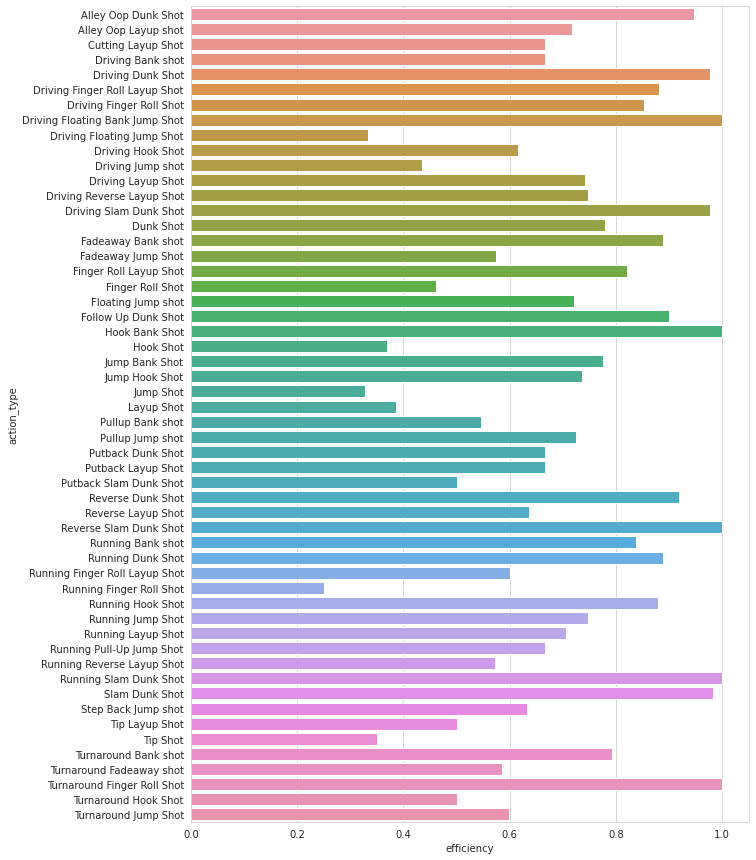

In [196]:
shots = df.groupby(['action_type'])['shot_made_flag'].value_counts(normalize=True).reset_index(name="efficiency")
shots_cleaned = shots[shots['shot_made_flag'] == 1.0][['action_type', 'efficiency']]
plt.figure(figsize=(10,15))
# todo order
ax = sns.barplot(data=shots_cleaned, x='efficiency', y='action_type', orient='h')

# Questions we want to answer
How does the shooting efficiency change:
- during every season.
- by time left
- by distance
- by minutes remaining in each quarter.
- versus playing with different teams
- in the playofs

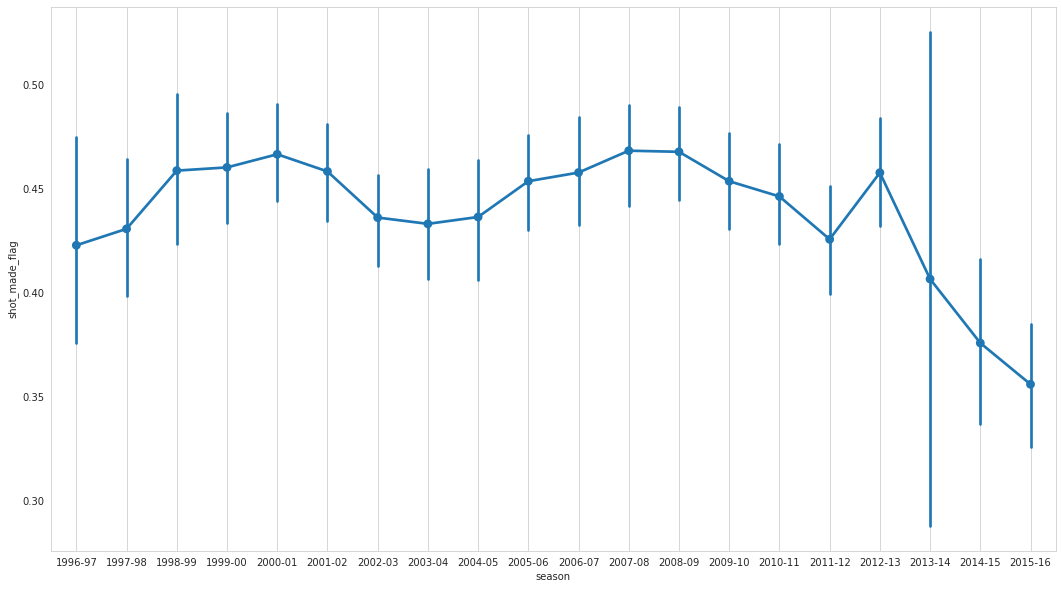

In [197]:
plt.figure(figsize=(18, 10))
ax = sns.pointplot(x='season', y='shot_made_flag', data=df, order=sorted(list(df['season'].unique())))
ax.grid()


## Shooting playoff vs regular season
We notice that in most cases the shooting decreases in playoff

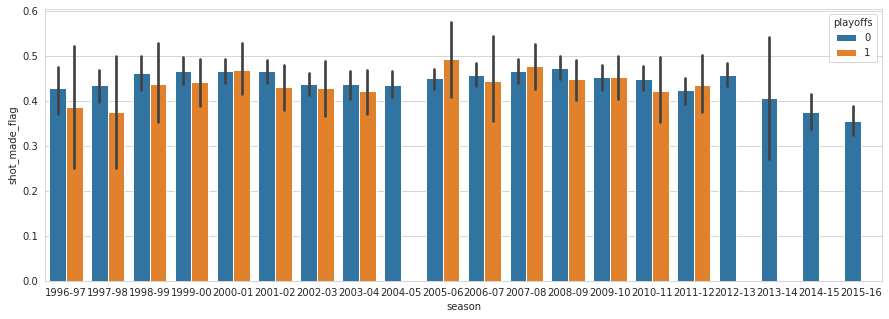

In [198]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='season', y='shot_made_flag', hue='playoffs',data=df, order=sorted(list(df['season'].unique())))


## Shot efficiency by time left
for each period get the shot efficiency by time
We see that as the remaining time decreases, the shot efficiency is decreasing.

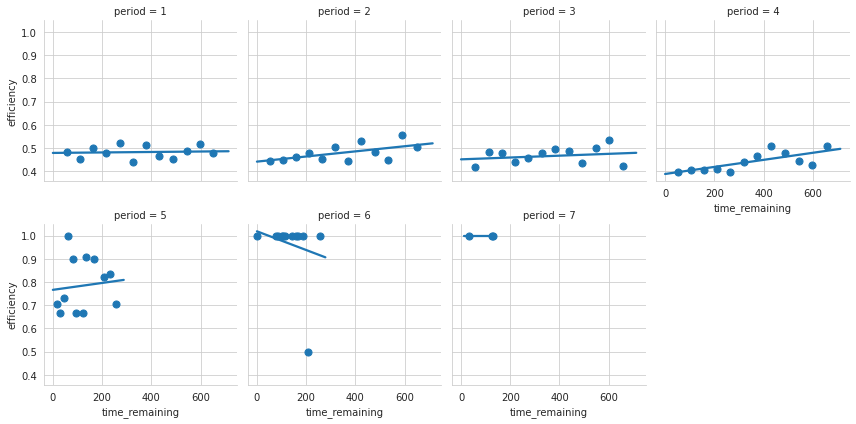

In [199]:
shot_period = df.groupby(['period', 'time_remaining'])['shot_made_flag'].value_counts(normalize=True).reset_index(name="efficiency")
shot_period = shot_period[shot_period['shot_made_flag'] == 1.0][['period', 'time_remaining', 'efficiency']]

g = sns.FacetGrid(shot_period, col="period", col_wrap=4)
g.map(sns.regplot,'time_remaining', 'efficiency', data=shot_period, x_bins=12, ci=None)

# Versus teams
Variance is high for teams like BKN and VAN as they are new/old franchises.

<AxesSubplot:xlabel='opponent', ylabel='shot_made_flag'>

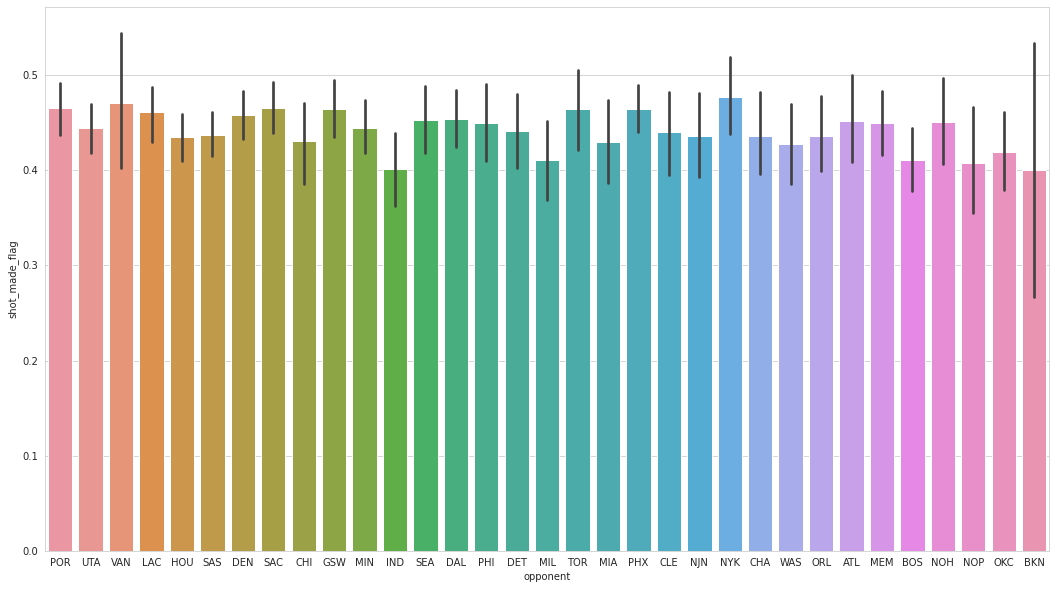

In [200]:
plt.figure(figsize=(18, 10))
sns.barplot(x='opponent', y='shot_made_flag', data=df)

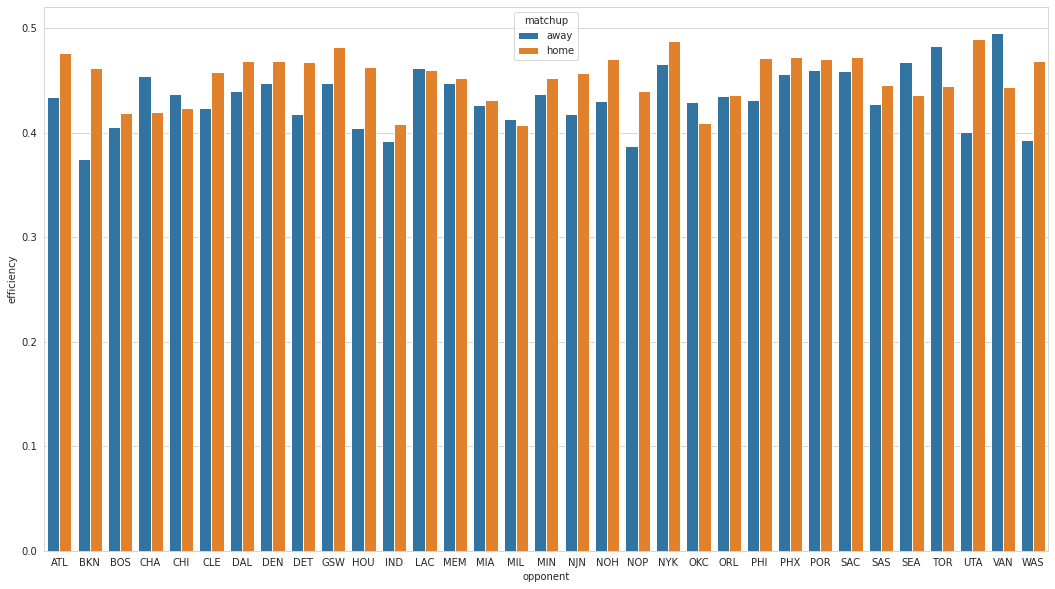

In [201]:
# shot_period = df.groupby(['period', 'time_remaining'])['shot_made_flag'].value_counts(normalize=True).reset_index(name="efficiency")
# shot_period = shot_period[shot_period['shot_made_flag'] == 1.0][['period', 'time_remaining', 'efficiency']]
shot_team_home = df.groupby(['opponent', 'matchup'])['shot_made_flag'].value_counts(normalize=True).reset_index(name='efficiency')
shot_team_home = shot_team_home[shot_team_home['shot_made_flag'] == 1.0][['opponent', 'matchup', 'efficiency']]

plt.figure(figsize=(18, 10))
sns.barplot(x='opponent', y='efficiency', hue='matchup', data=shot_team_home)
del shot_team_home

/home/filip/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


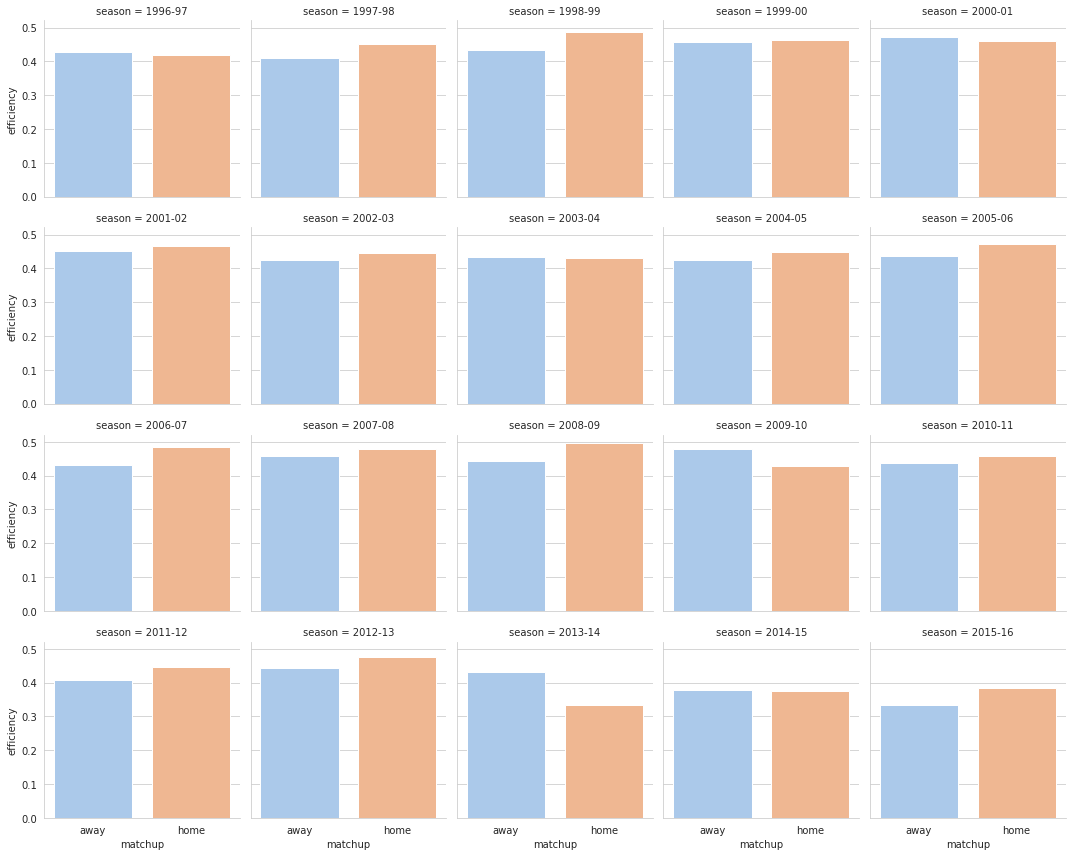

In [202]:
shot_team_home = df.groupby(['season', 'matchup'])['shot_made_flag'].value_counts(normalize=True).reset_index(name='efficiency')
shot_team_home = shot_team_home[shot_team_home['shot_made_flag'] == 1.0][['season', 'matchup', 'efficiency']]

g = sns.FacetGrid(shot_team_home, col="season", col_wrap=5)
g.map(sns.barplot,'matchup', 'efficiency', data=shot_team_home, palette='pastel')

(0.4, 0.5)

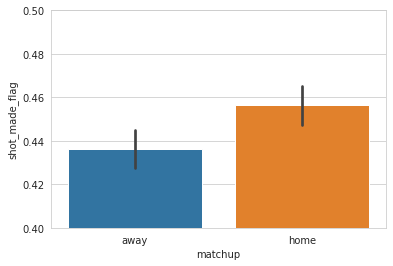

In [203]:
sns.barplot(x='matchup', y='shot_made_flag', data=df )
plt.ylim(0.4, 0.5)

Three point vs two point

<AxesSubplot:xlabel='season', ylabel='efficiency'>

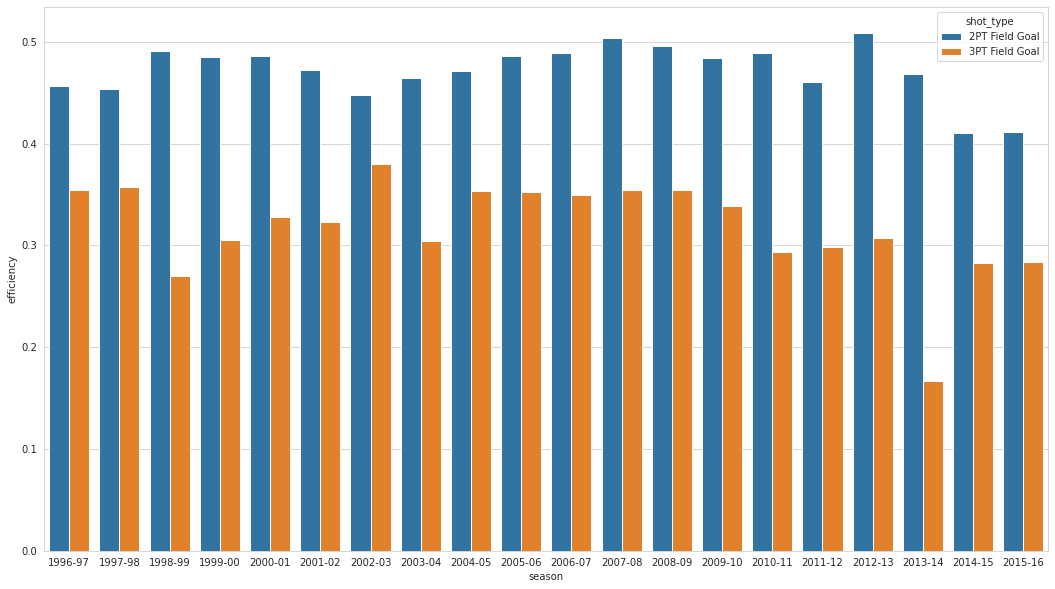

In [204]:
plt.figure(figsize=(18, 10))

shot_23 = df.groupby(['season', 'shot_type'])['shot_made_flag'].value_counts(normalize=True).reset_index(name='efficiency')
shot_23 = shot_23[shot_23['shot_made_flag'] == 1.0][['season', 'shot_type', 'efficiency']]
sns.barplot(data=shot_23, x='season', y='efficiency', hue='shot_type')

# Shot zoness

<AxesSubplot:xlabel='loc_x', ylabel='loc_y'>

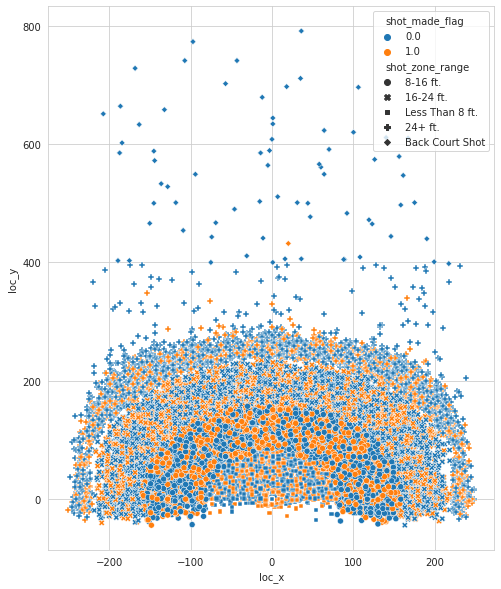

In [205]:
plt.figure(figsize=(8, 10))

sns.scatterplot(data=df, x='loc_x', y='loc_y', hue='shot_made_flag', style='shot_zone_range')

In [206]:
def plot_zone_wise(zone_name):
    c_mean = df.groupby(zone_name)['shot_made_flag'].mean()
    plt.figure(figsize=(15,15))
    for i, area in enumerate(df[zone_name].unique()):
        plt.subplot(121)
        c = df.loc[(df[zone_name]==area)]
        plt.scatter(c.loc_x, c.loc_y,alpha=1)
        plt.text(c.loc_x.mean(), c.loc_y.quantile(0.80), '%0.3f'%(c_mean[area]),size=15, bbox=dict(facecolor='red', alpha=0.5))
        plt.ylim(-100, 900)
    plt.legend(df[zone_name].unique())
    plt.title(zone_name)
    plt.show()

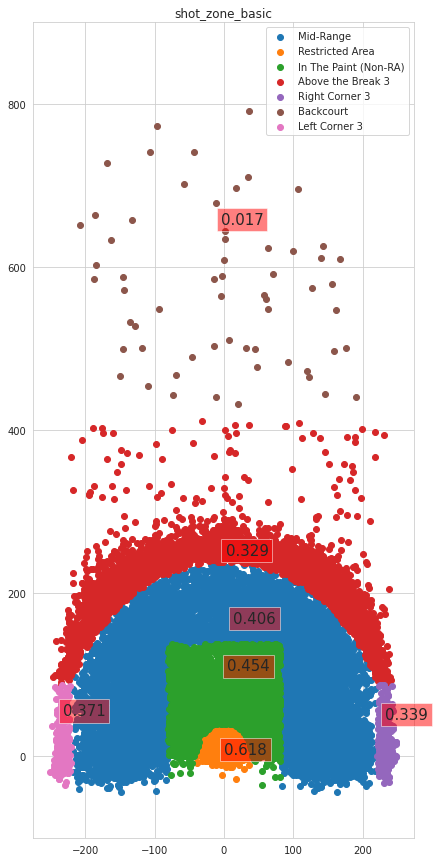

In [207]:
plot_zone_wise('shot_zone_basic')

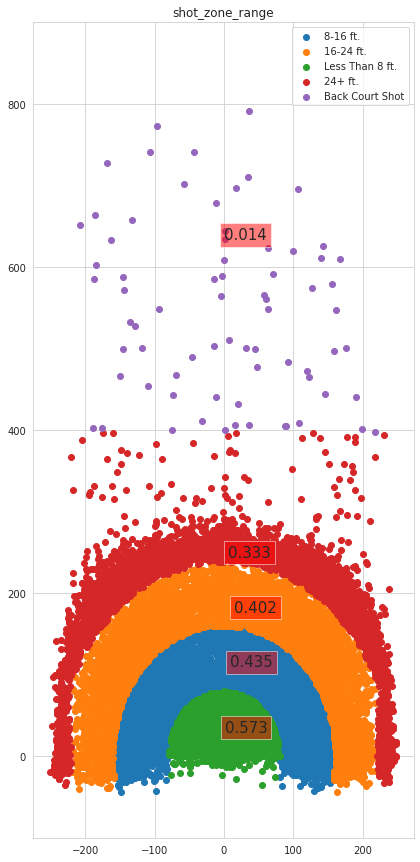

In [208]:
plot_zone_wise('shot_zone_range')

In [209]:
plot_zone_wise('shot_zone_area')a['Dunk']

SyntaxError: invalid syntax (3771049570.py, line 1)

<AxesSubplot:xlabel='shot_distance'>

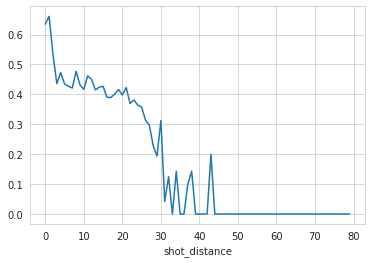

In [210]:
df.groupby('shot_distance')['shot_made_flag'].mean().plot(kind='line')

# Feature engineering

Get the average value per season and perform a +/-

In [211]:
def generate_points_from_game(game_id):
    points = int(sum(df[df.game_id == game_id]['shot_made_flag'] * df[df.game_id == game_id].apply(lambda x: 2 if x['shot_type'] == '2PT Field Goal' else 3, axis=1)))
    df.loc[df['game_id'] == game_id, 'points'] = points
    return points

In [212]:
def generate_average_per_season(season):
    points_avg = round(df.loc[df.season == season, ['game_id', 'points']].drop_duplicates()['points'].mean(),2)
    df.loc[df['season'] == season, 'season_avg'] = points_avg
    return points_avg

In [213]:
def generate_plus_minus_per_season(season):
    df['plus_minus'] = df['points'] - df['season_avg']

Shooting performance FG

In [253]:
def field_goal_percentage(game_id):
    FGP = round(df[df.game_id == game_id]['shot_made_flag'].mean(),3)
    df.loc[df['game_id'] == game_id, 'FGP'] = FGP
    return FGP

Extracting the month, players shoot differently depending on the month

In [273]:
def extract_month():
    df['month'] = df.game_date.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").month)


In [274]:
# get points scored per game
# shot_type = '2PT Field Goal'
# shot_made_flag 1.0 0.0
# df[df.game_id == 20000012].apply(lambda x: x['shot_type'], axis=1)

def feature_engineering():
    df['points'] = ""
    df['season_avg'] = ""
    df['FGP'] = ""

    for game_id in df.game_id.unique():
        generate_points_from_game(game_id)
        field_goal_percentage(game_id)

    for season in df.season.unique():
        generate_average_per_season(season)

    for season in df.season.unique():
        generate_plus_minus_per_season(season)

    extract_month()

FGP per month

<AxesSubplot:xlabel='season', ylabel='FGP'>

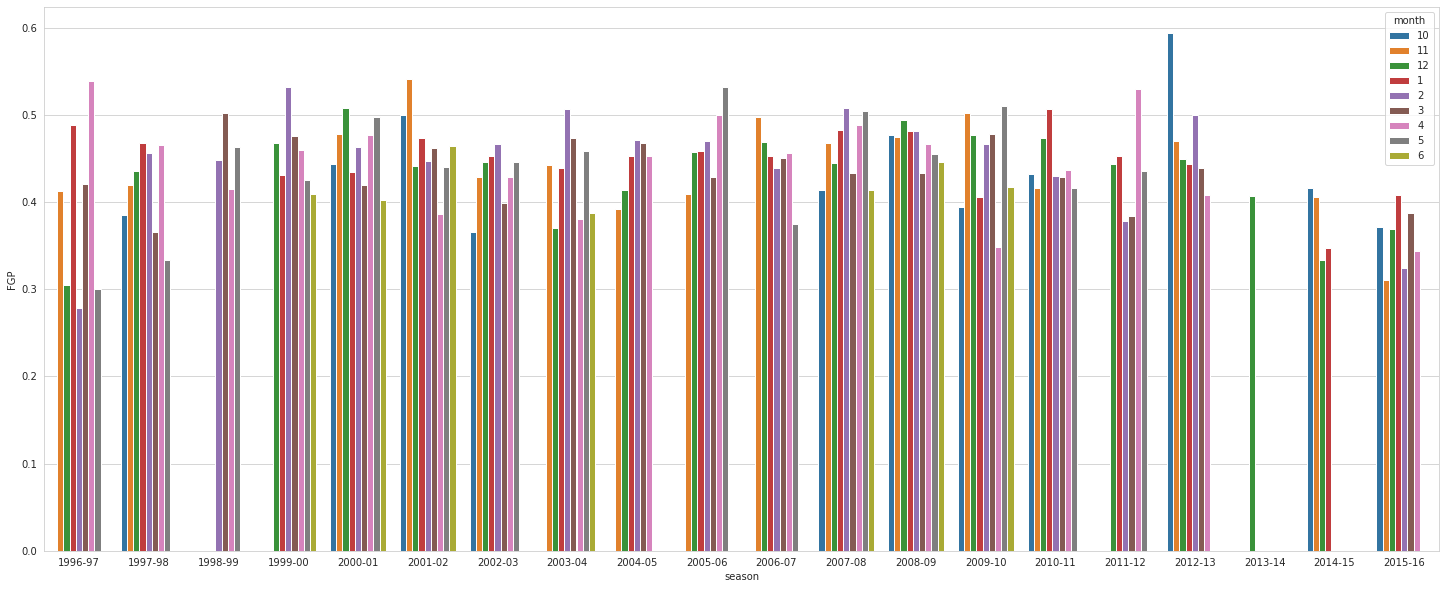

In [313]:
plt.figure(figsize=(25,10))
df_fgp = df.groupby(['season', 'month'])['FGP'].mean().reset_index(name='FGP')
sns.barplot(data=df_fgp, x='season', y='FGP', hue='month',ci=None, hue_order=[10,11,12,1,2,3,4,5,6])

FGP per game in a season

/home/filip/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/filip/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


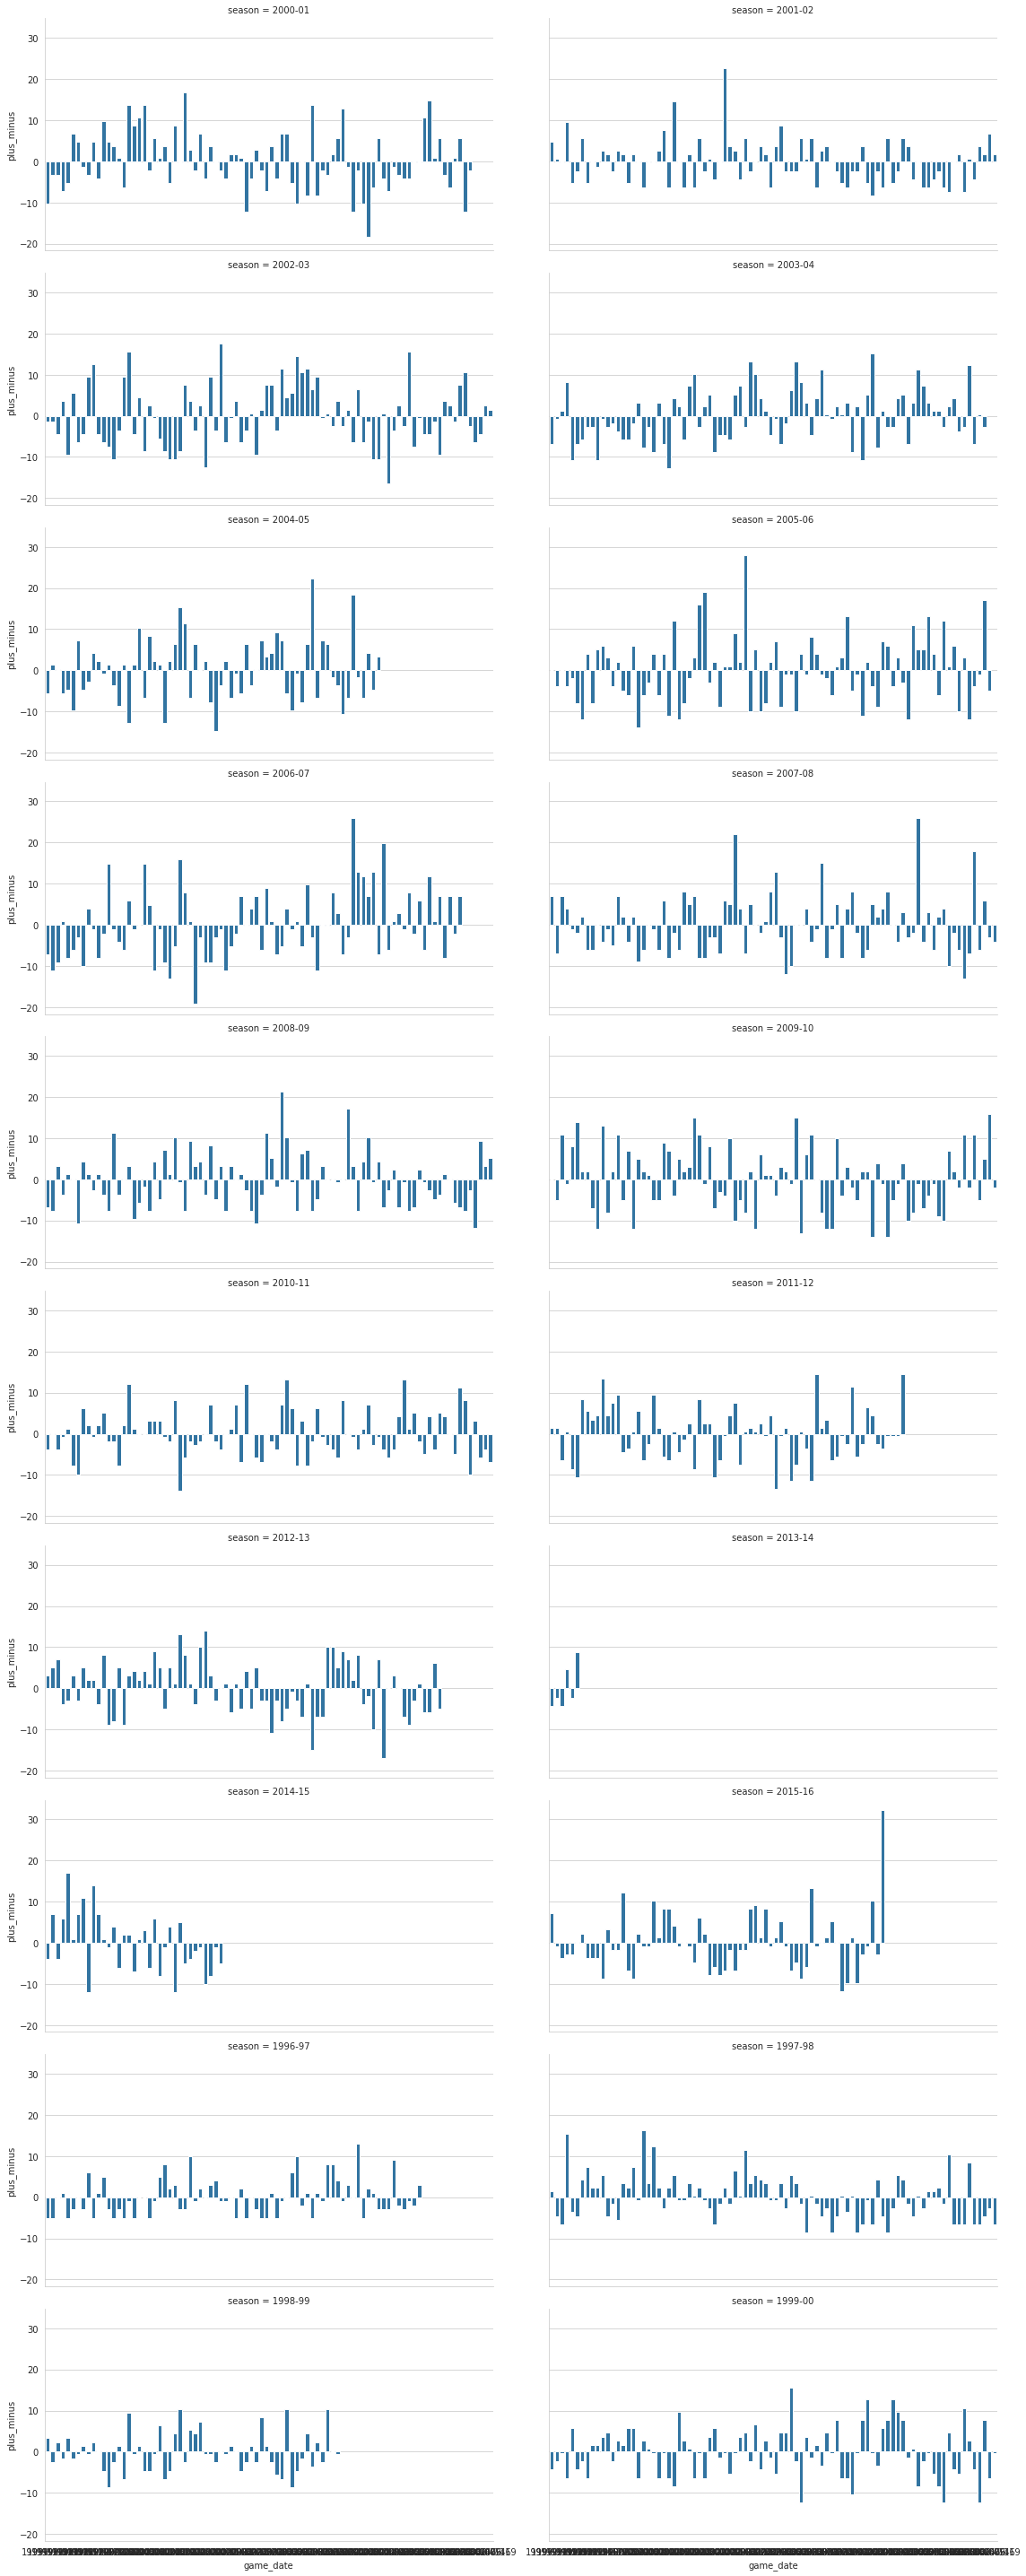

In [366]:
df_pm = df[['season', 'plus_minus', 'game_date']].drop_duplicates()
g = sns.FacetGrid(df_pm, col="season", col_wrap=2, size=4, aspect=2)
g.map(sns.barplot,'game_date', 'plus_minus', data=df_pm)